In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_large.csv
/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_custom_ratios.csv


In [2]:
import kagglehub
import numpy as np
import pandas as pd

# Download latest version
path_1 = '/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_custom_ratios.csv'
path_2 = '/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_large.csv'

In [3]:
data_cust = pd.read_csv(path_1)
data_ratio = pd.read_csv(path_2)

In [4]:
data_cust

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1


In [5]:
data_cust.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [6]:

data_cust['Returns']  = data_cust['Returns'].fillna(0).infer_objects(copy=False)
data_cust['Returns']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
249995    1.0
249996    1.0
249997    0.0
249998    0.0
249999    1.0
Name: Returns, Length: 250000, dtype: float64

In [7]:
#Customer RFM Analysis
data_cust['Purchase Date'] = pd.to_datetime(data_cust['Purchase Date'])

data_cust['Recency'] = (data_cust['Purchase Date'].max() - data_cust['Purchase Date']).dt.days
data_cust['Recency'].reset_index()

,index,Recency
0,0,1102
1,1,558
2,2,479
3,3,1036
4,4,1021
...,...,...
249995,249995,35
249996,249996,661
249997,249997,1169
249998,249998,989


In [8]:
data_cust['Monetary'] = data_cust.groupby('Customer ID')['Total Purchase Amount'].transform('sum')

In [9]:
data_cust['Monetary'].reset_index()

,index,Monetary
0,0,10184
1,1,10184
2,2,10184
3,3,10184
4,4,12223
...,...,...
249995,249995,2187
249996,249996,3615
249997,249997,2466
249998,249998,3668


In [10]:
data_cust.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Recency,Monetary
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0,1102,10184
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0,558,10184
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0,479,10184
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0,1036,10184
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1,1021,12223


In [11]:
low_recency_threshold = data_cust['Recency'].quantile(0.15)
low_recency_threshold

202.0

In [12]:
low_recency_customers = data_cust[data_cust['Recency'] <= low_recency_threshold]
low_recency_customers

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Recency,Monetary
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1.0,James Grant,49,Female,1,191,12223
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0.0,James Grant,49,Female,1,153,12223
9,28805,2023-09-13 04:24:00,Electronics,394,2,1993,Credit Card,19,0.0,Jose Collier,19,Male,0,2,9557
17,28961,2023-06-18 21:34:27,Clothing,259,1,2975,Credit Card,55,0.0,James Stein,55,Male,0,88,14473
19,28961,2023-06-01 19:07:10,Books,232,3,4452,PayPal,55,1.0,James Stein,55,Male,0,105,14473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249968,15196,2023-04-13 05:07:24,Electronics,227,4,3865,Credit Card,45,0.0,Andrew Patterson,45,Male,0,155,3865
249970,9182,2023-04-01 21:07:58,Books,35,5,3263,Credit Card,21,0.0,Kristin Lynn,21,Female,0,166,3263
249974,40179,2023-03-13 00:04:05,Electronics,63,4,3986,Credit Card,32,1.0,Dale Meadows,32,Male,1,186,3986
249982,6943,2023-09-01 00:12:41,Home,207,1,2968,Credit Card,58,1.0,Brian Barnes,58,Male,0,14,2968


In [13]:
high_monetary_threshold = data_cust['Monetary'].quantile(0.75)
high_monetary_customer = data_cust[data_cust['Monetary'] >= high_monetary_threshold]
high_monetary_customer

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Recency,Monetary
71,49593,2022-12-19 18:27:11,Home,136,5,3200,PayPal,24,1.0,Steve Patton,24,Male,1,269,27087
72,49593,2021-05-21 20:48:43,Home,299,2,1171,Crypto,24,0.0,Steve Patton,24,Male,1,846,27087
73,49593,2022-01-08 14:20:13,Books,196,1,2550,Credit Card,24,0.0,Steve Patton,24,Male,1,614,27087
74,49593,2021-05-01 15:03:48,Books,227,3,1856,PayPal,24,0.0,Steve Patton,24,Male,1,866,27087
75,49593,2022-10-03 23:40:34,Home,291,2,419,Credit Card,24,1.0,Steve Patton,24,Male,1,346,27087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248932,12230,2020-08-31 19:33:27,Clothing,316,5,3391,Credit Card,62,0.0,Karen Wiggins,62,Male,0,1109,24214
248933,12230,2021-06-14 07:46:19,Home,107,4,3703,Cash,62,0.0,Karen Wiggins,62,Male,0,823,24214
248934,12230,2020-03-24 00:58:40,Books,176,2,5289,Credit Card,62,1.0,Karen Wiggins,62,Male,0,1270,24214
248935,12230,2023-08-23 03:22:31,Books,365,2,4825,Credit Card,62,0.0,Karen Wiggins,62,Male,0,23,24214


In [14]:
common_customers = data_cust[
    (data_cust['Recency'] <= low_recency_threshold) &  # Recent buyers
    (data_cust['Monetary'] >= high_monetary_threshold)]  # High spenders

In [15]:
common_customers

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Recency,Monetary
122,36664,2023-07-19 02:29:17,Books,340,5,965,Credit Card,22,0.0,Scott Calhoun,22,Female,1,58,21018
135,6089,2023-05-23 18:03:19,Books,46,4,4767,Credit Card,49,0.0,Megan Reed,49,Male,0,114,26384
180,3443,2023-05-15 12:34:36,Books,425,4,2386,PayPal,52,1.0,Dr. Hunter Liu Jr.,52,Female,1,122,21503
237,33320,2023-07-31 21:39:43,Clothing,205,5,442,Credit Card,21,0.0,Laura Vance,21,Male,1,45,20949
254,7547,2023-03-02 04:57:36,Electronics,49,1,4400,PayPal,43,0.0,Christina Miller,43,Male,0,197,25406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246701,2706,2023-07-23 12:52:00,Clothing,348,2,2116,PayPal,44,1.0,William Madden,44,Male,0,53,24115
246964,20673,2023-07-18 03:08:01,Electronics,417,4,4357,PayPal,21,0.0,Carmen Casey,21,Female,0,59,22575
247162,10331,2023-08-26 03:55:03,Clothing,155,4,4628,Cash,45,0.0,Cynthia Cooper,45,Male,0,20,21403
248931,12230,2023-03-01 14:18:02,Clothing,391,5,717,Credit Card,62,0.0,Karen Wiggins,62,Male,0,197,24214


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

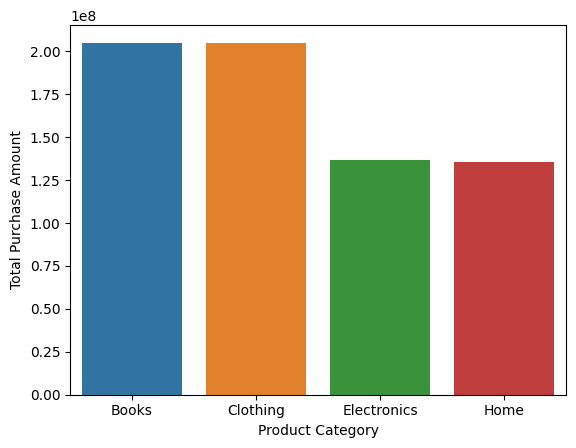

In [17]:
category_wise_sales = data_cust.groupby('Product Category')['Total Purchase Amount'].sum().reset_index()
sns.barplot(x = 'Product Category', y = 'Total Purchase Amount', data = category_wise_sales)
plt.show()